# Oringen de los Datos 
Estos datos corresponden a mediciones de temperatura recolectadas en terreno en las cercanias de la base Antartica H.Arctowsky.
En particular para este documento se utilizaron las mediciones de un solo dia en particular 2020-02-12 (24H). 

(24H de datos corresponden a aproximadamente 1400 datos, tome la decision de no recortar el dataset para representar las 24HRS de un dia en su totalidad)


Más informacion de los datos puede encontrarse en el siguiente repositorio:
> https://github.com/HALxmont/AntarticData

![alt text](spotdronanglecomp.jpg "H.Arctowsky Experiments Spot")

In [388]:
#import librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')

In [389]:
#read Colobantus data
data_frame_c_day = pd.read_csv('2020-02-12_C_HEATING_Dia.csv')
data_frame_c_night = pd.read_csv('2020-02-12_C_HEATING_Noche.csv')

#read Deschampsia data
data_frame_d_day = pd.read_csv('2020-02-12_D_HEATING_Dia.csv')
data_frame_d_night = pd.read_csv('2020-02-12_D_HEATING_Noche.csv')


# Primera vista de los datos
> Describe dataframe

> View missing or NaN values

## Descripcion de los datos
> Utilizamos funcion describe()

In [390]:
#let do some describe 
print('========== Colobantus Day ==========')
print('')
print(data_frame_c_day.describe())
print('==========================================================================')
print('')

print('========== Colobantus Night ==========')
print('')
print(data_frame_c_night.describe())
print('==========================================================================')
print('')


print('========== Deschampsia Day ==========')
print('')
print(data_frame_d_day.describe())
print('==========================================================================')
print('')

print('========== Deschampsia Night ==========')
print('')
print(data_frame_d_night.describe())
print('==========================================================================')
print('')

========== Colobantus Day ==========

       TempPlant1  TempPlant5  TempPlant6  Air_temp_loc      Humedity  \
count  856.000000  855.000000  855.000000           0.0  8.560000e+02   
mean     8.877523    7.754912    7.640152           NaN -2.046200e+00   
std      4.160611    2.730142    3.628913           NaN  4.443488e-16   
min      3.530000    2.850000    2.550000           NaN -2.046200e+00   
25%      6.380000    6.170000    5.470000           NaN -2.046200e+00   
50%      7.570000    7.270000    6.650000           NaN -2.046200e+00   
75%     10.890000    9.410000    9.270000           NaN -2.046200e+00   
max     26.610000   16.650000   19.470000           NaN -2.046200e+00   

         air_temp   Ambient_1  
count  856.000000  856.000000  
mean     6.593428    4.598629  
std      2.281089    1.260239  
min      3.312000    2.312000  
25%      5.421500    3.562000  
50%      6.437000    4.937000  
75%      8.062000    5.687000  
max     13.062000    6.812000  

========== Colo

In [391]:
# De las descripcion obtenida de los datos notamos que la columna 'Air_temp_loc' presenta valores NaN
# Esto se debio seguramente a fallas del sensor
#Procedemos a revisar los elementos nulos para todas las filas de cada uno de los dataframes



print('========== Colobantus Day ==========')

print('Total de datos: ', len(data_frame_c_day))
print('')
print('Elementos nulos de cada columna en el DataFrame:')
print(data_frame_c_day.isna().sum())
print('')


print('========== Colobantus Night ==========')

print('Total de datos: ', len(data_frame_c_night))
print('')
print('Elementos nulos de cada columna en el DataFrame:')
print(data_frame_c_night.isna().sum())

print('========== Deschampsia Day ==========')

print('Total de datos: ', len(data_frame_d_day))
print('')
print('Elementos nulos de cada columna en el DataFrame:')
print(data_frame_d_day.isna().sum())
print('')


print('========== Deschampsia Night ==========')

print('Total de datos: ', len(data_frame_d_night))
print('')
print('Elementos nulos de cada columna en el DataFrame:')
print(data_frame_d_night.isna().sum())

========== Colobantus Day ==========
Total de datos:  890

Elementos nulos de cada columna en el DataFrame:
time              0
TempPlant1       34
TempPlant5       35
TempPlant6       35
Air_temp_loc    890
Humedity         34
air_temp         34
Ambient_1        34
dtype: int64

========== Colobantus Night ==========
Total de datos:  550

Elementos nulos de cada columna en el DataFrame:
time              0
TempPlant1       18
TempPlant5       18
TempPlant6       18
Air_temp_loc    550
Humedity         15
air_temp         15
Ambient_1        15
dtype: int64
========== Deschampsia Day ==========
Total de datos:  890

Elementos nulos de cada columna en el DataFrame:
time              0
TempPlant2       35
TempPlant3       35
TempPlant4       35
Air_temp_loc    890
Humedity         34
air_temp         34
Ambient_1        34
dtype: int64

========== Deschampsia Night ==========
Total de datos:  550

Elementos nulos de cada columna en el DataFrame:
time              0
TempPlant2       18
T

In [392]:
# Notamos que la columna 'Air_temp_loc' presenta una totalidad de datos NaN, procedemos a hacer un drop()
# Para las demas columnas podemos rellenar los datos faltantes con el promedio de las demas mediciones, eliminar las filas que posean NaN o 
# tambien podemos interpolar. Para este caso enparticular utilizaremos interpolacion ya que no existen mas de 5 NaN seguidos entre mediciones
#(menos de 5 datos perdidos seguidos)

#drop column

data_frame_c_day =  data_frame_c_day.drop('Air_temp_loc', axis = 'columns')
data_frame_c_night =  data_frame_c_night.drop('Air_temp_loc', axis = 'columns')

data_frame_d_day =  data_frame_d_day.drop('Air_temp_loc', axis = 'columns')
data_frame_d_night =  data_frame_d_night.drop('Air_temp_loc', axis = 'columns')

#refill with linear interpolation

data_frame_c_day =  data_frame_c_day.interpolate()
data_frame_c_night =  data_frame_c_night.interpolate()

data_frame_d_day =  data_frame_d_day.interpolate()
data_frame_d_night =  data_frame_d_night.interpolate()


# Procesamiento pre-plot 
Procederemos a juntar algunas columnas de interes para generar algunas gráficas.

> Se agruparan los datos de los dataframes por dia y noche para las especies Deschampsia y Colobantus.

>El reultado seran dos dataframes, uno par ala noche y otro para el dia. 

In [393]:
#utilizamos concat()
data_day = pd.concat([data_frame_c_day[['time', 'TempPlant1', 'TempPlant5', 'TempPlant6', 'air_temp', 'Ambient_1']], data_frame_d_day[['TempPlant2', 'TempPlant3', 'TempPlant4']]], axis = 1)
data_night = pd.concat([data_frame_c_night[['time', 'TempPlant1', 'TempPlant5', 'TempPlant6', 'air_temp', 'Ambient_1']], data_frame_d_night[['TempPlant2', 'TempPlant3', 'TempPlant4']]], axis = 1)
data_24 = pd.concat([data_day, data_night])

In [394]:
data_24

,time,TempPlant1,TempPlant5,TempPlant6,air_temp,Ambient_1,TempPlant2,TempPlant3,TempPlant4
0,2020-02-12T06:05:00.0,10.17,10.23,9.99,5.750,5.0000,10.09,10.17,8.97
1,2020-02-12T06:06:00.0,8.89,8.83,8.93,5.750,5.0620,9.61,9.29,8.37
2,2020-02-12T06:07:00.0,7.61,8.09,8.41,5.750,5.0620,8.71,8.47,7.69
3,2020-02-12T06:08:00.0,7.97,8.27,8.23,5.812,5.1870,8.23,7.97,7.79
4,2020-02-12T06:09:00.0,8.01,7.73,8.15,5.812,5.3750,8.05,7.65,7.15
...,...,...,...,...,...,...,...,...,...
545,2020-02-12T23:55:00.0,6.43,6.75,6.51,2.812,1.8120,5.95,4.57,4.57
546,2020-02-12T23:56:00.0,5.77,6.79,6.54,2.812,1.8435,5.86,4.64,4.68
547,2020-02-12T23:57:00.0,5.11,6.83,6.57,2.812,1.8750,5.77,4.71,4.79
548,2020-02-12T23:58:00.0,5.85,6.83,6.53,2.875,1.8750,5.55,4.67,4.89


# Plots
will do:
> LinesPlot

> HistPlot

> BoxPlot

## Line plot

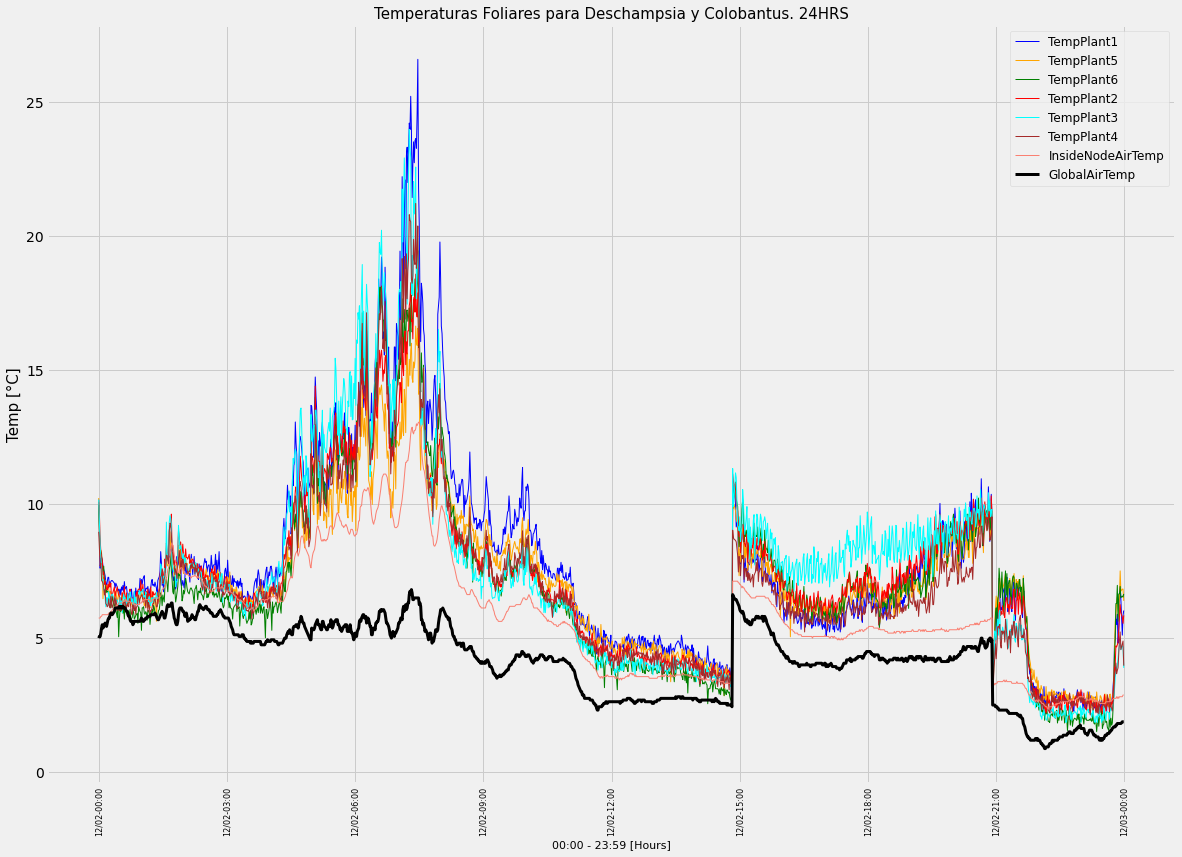

In [395]:
#create vector time
time = pd.date_range(start='12-02-2020 00:00', end = '12-02-2020 23:59', freq = '1min')  #24hrs


#CREATE PLOT
ax = plt.figure(figsize=(18, 13)).add_subplot(111)

#plantas
plt.plot(time, data_24.iloc[:,1], color = 'blue', label = 'TempPlant1', linewidth = 1)
plt.plot(time, data_24.iloc[:,2], color = 'orange', label = 'TempPlant5', linewidth = 1)
plt.plot(time, data_24.iloc[:,3], color = 'green', label = 'TempPlant6', linewidth = 1)
plt.plot(time, data_24.iloc[:,6], color = 'red', label = 'TempPlant2', linewidth = 1)
plt.plot(time, data_24.iloc[:,7], color = 'cyan', label = 'TempPlant3', linewidth = 1)
plt.plot(time, data_24.iloc[:,8], color = 'brown', label = 'TempPlant4', linewidth = 1)

#ambiente
plt.plot(time, data_24.iloc[:,4], color = 'salmon', label = 'InsideNodeAirTemp', linewidth = 1)
plt.plot(time, data_24.iloc[:,5], color = 'black', label = 'GlobalAirTemp', linewidth = 3)

#atributos de la grafica
plt.title('Temperaturas Foliares para Deschampsia y Colobantus. 24HRS', fontsize = 15)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d-%H:%S'))  #formatos para axis x 
plt.xticks(fontsize=8,rotation=90)
plt.xlabel('00:00 - 23:59 [Hours]', fontsize=11)
plt.ylabel('Temp [°C]', fontsize=15)
plt.legend(fontsize = 12)
#plt.savefig("Deschampsia_Colobanthus_Day_and_Night.pdf")
plt.show()


## Bar Plots

Text(0, 0.5, 'Frecuencia')

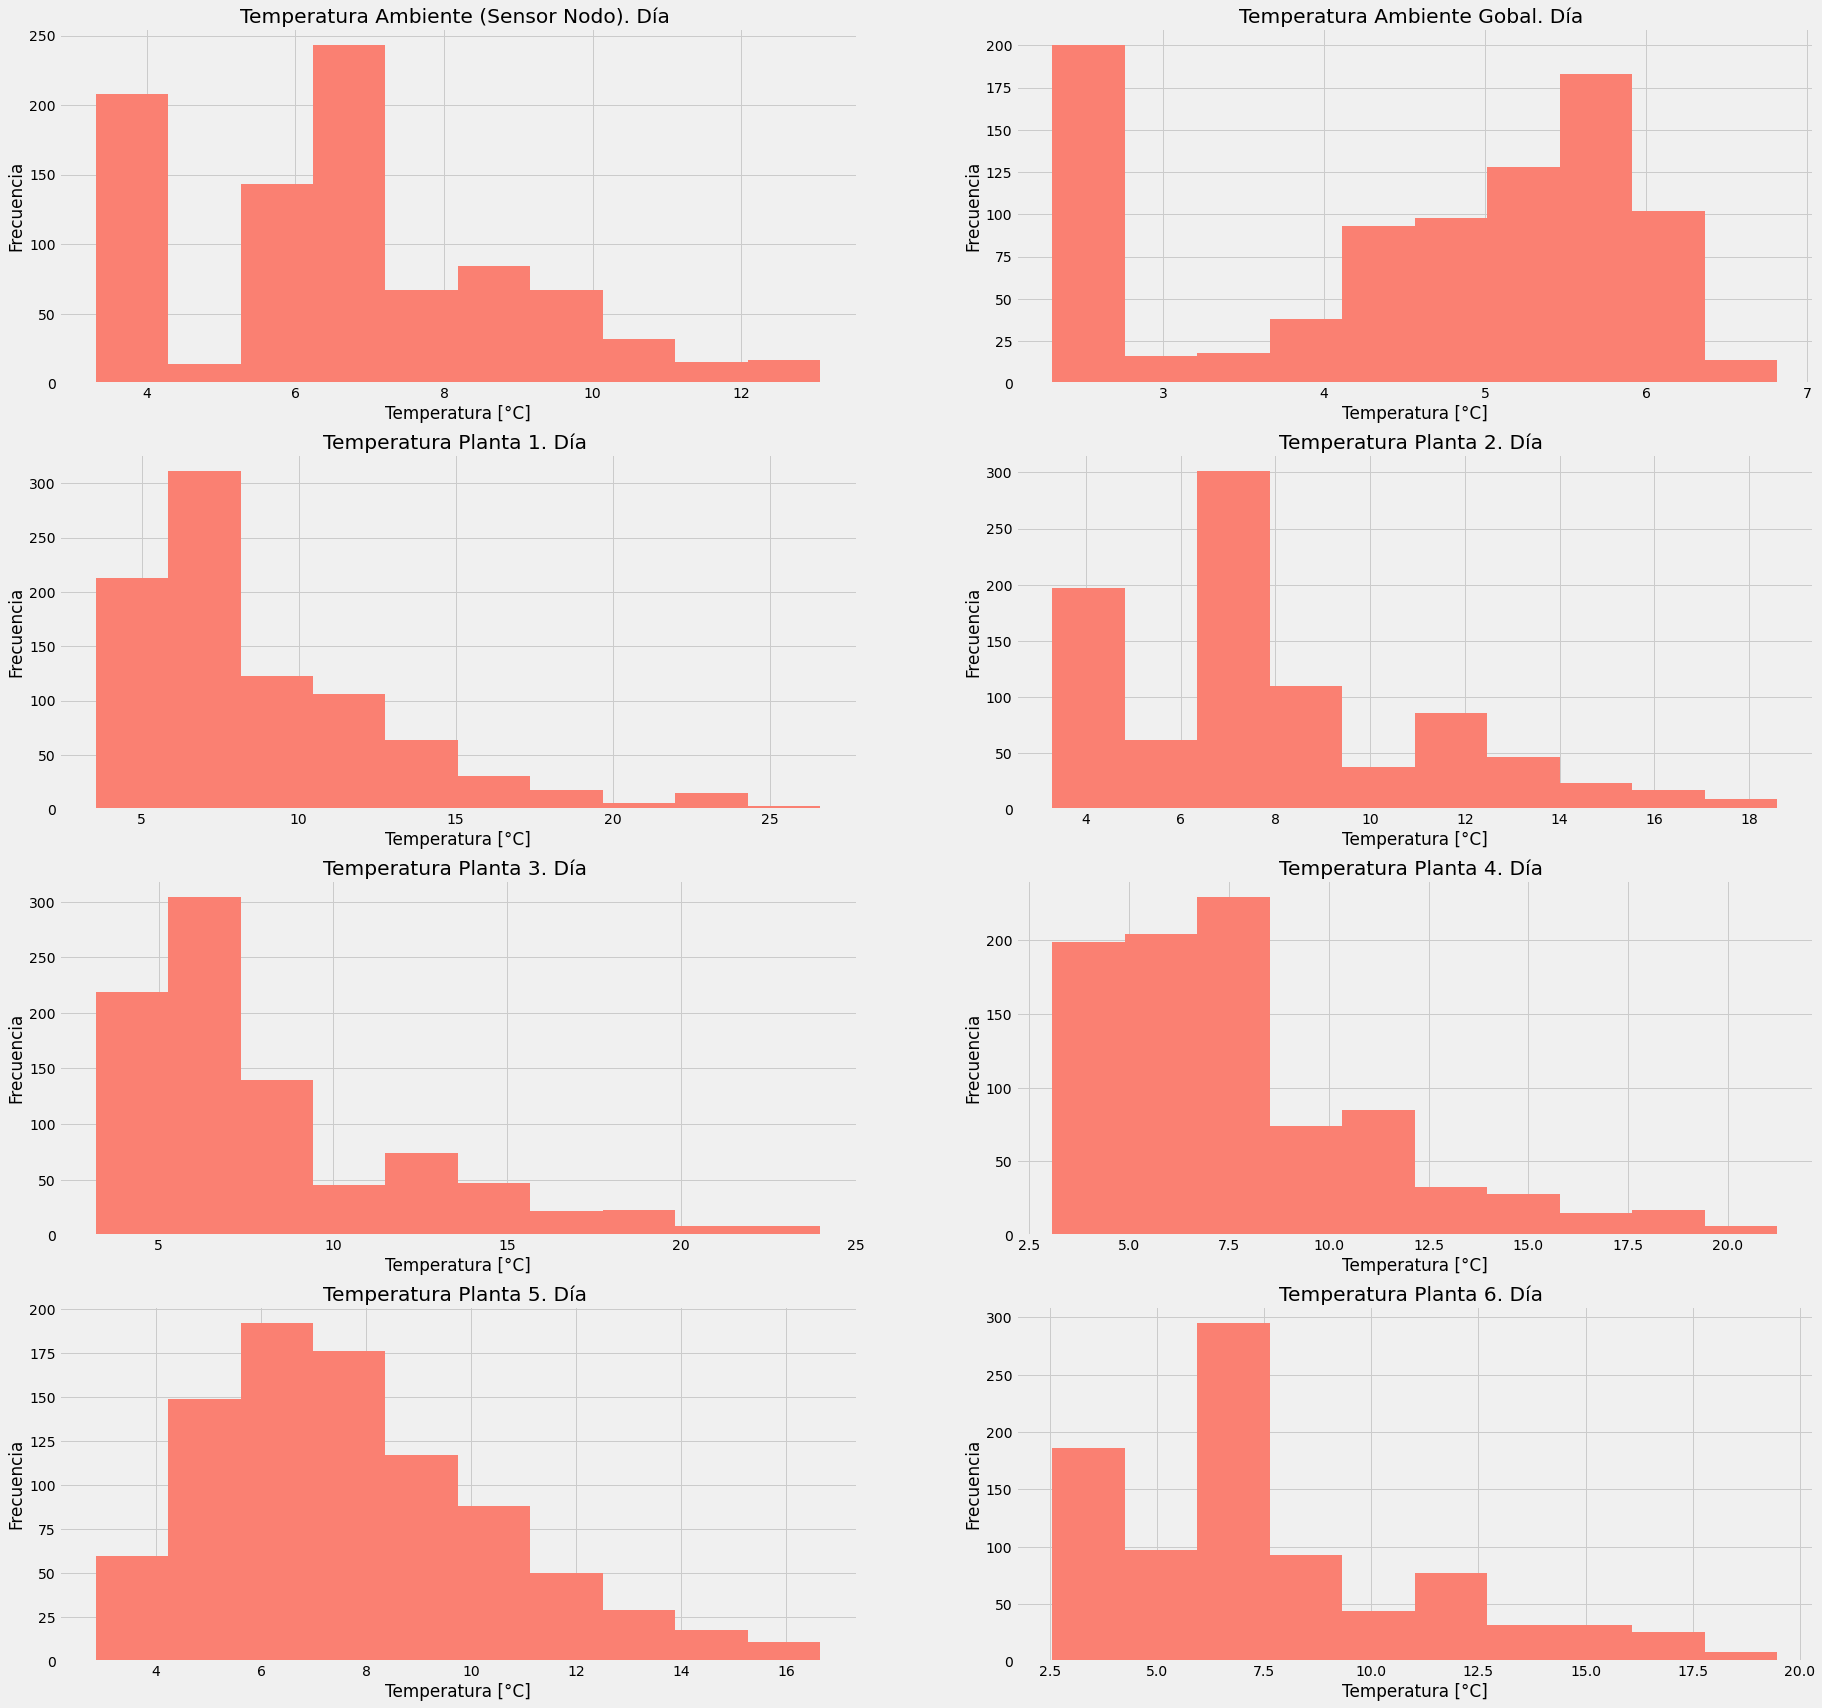

In [396]:
#generaremos un grafico de historicos
#'TempPlant5', 'TempPlant6', 'air_temp', 'Ambient_1'
#TempPlant2', 'TempPlant3', 'TempPlant4'


#DAY
plt.figure(figsize=(28, 28))
plt.grid(False)

plt.subplot(421)
plt.hist(data_day['air_temp'], color = 'salmon')
plt.title('Temperatura Ambiente (Sensor Nodo). Día ')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')

plt.subplot(422)
plt.hist(data_day['Ambient_1'], color = 'salmon')
plt.title('Ambient_1')
plt.title('Temperatura Ambiente Gobal. Día ')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')

plt.subplot(423)
plt.hist(data_day['TempPlant1'], color = 'salmon')
plt.title('Temperatura Planta 1. Día ')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')

plt.subplot(424)
plt.hist(data_day['TempPlant2'], color = 'salmon')
plt.title('Temperatura Planta 2. Día ')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')

plt.subplot(425)
plt.hist(data_day['TempPlant3'], color = 'salmon')
plt.title('Temperatura Planta 3. Día ')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')

plt.subplot(426)
plt.hist(data_day['TempPlant4'], color = 'salmon')
plt.title('Temperatura Planta 4. Día ')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')

plt.subplot(427)
plt.hist(data_day['TempPlant5'], color = 'salmon')
plt.title('Temperatura Planta 5. Día ')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')

plt.subplot(428)
plt.hist(data_day['TempPlant6'], color = 'salmon')
plt.title('Temperatura Planta 6. Día ')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')






Text(0, 0.5, 'Frecuencia')

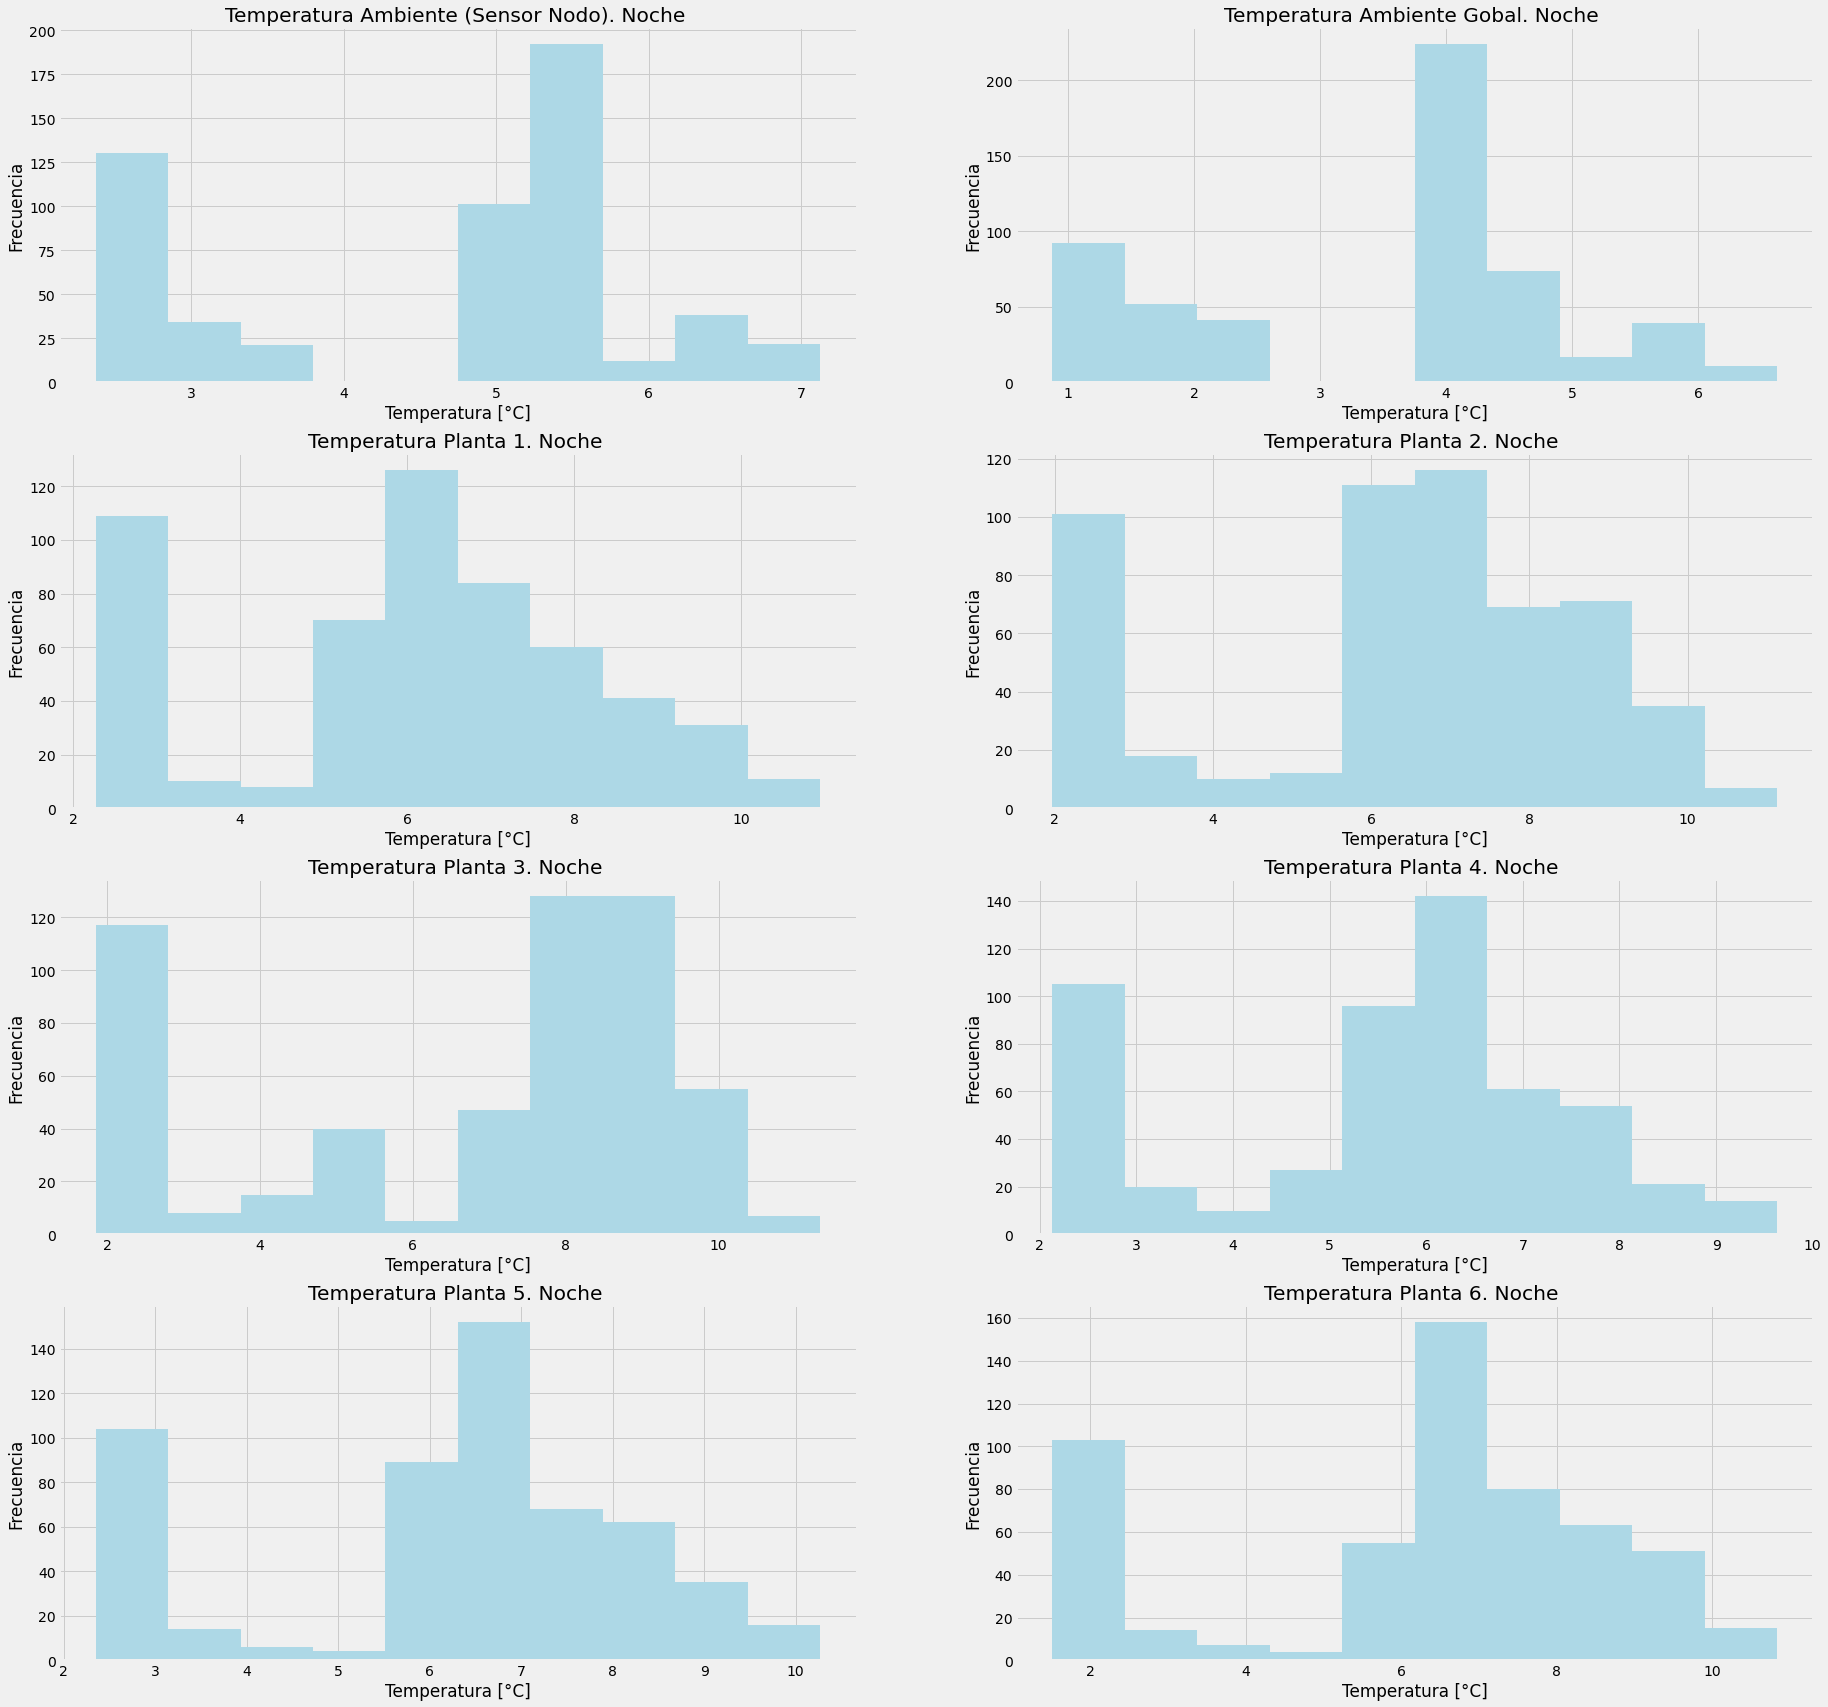

In [397]:
#NIGHT
#generaremos un grafico de historicos
#'TempPlant5', 'TempPlant6', 'air_temp', 'Ambient_1'
#TempPlant2', 'TempPlant3', 'TempPlant4'

plt.figure(figsize=(28, 28))
plt.grid(False)

plt.subplot(421)
plt.hist(data_night['air_temp'], color = 'lightblue')
plt.title('Temperatura Ambiente (Sensor Nodo). Noche ')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')

plt.subplot(422)
plt.hist(data_night['Ambient_1'], color = 'lightblue')
plt.title('Ambient_1')
plt.title('Temperatura Ambiente Gobal. Noche ')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')

plt.subplot(423)
plt.hist(data_night['TempPlant1'], color = 'lightblue')
plt.title('Temperatura Planta 1. Noche ')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')

plt.subplot(424)
plt.hist(data_night['TempPlant2'], color = 'lightblue')
plt.title('Temperatura Planta 2. Noche ')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')

plt.subplot(425)
plt.hist(data_night['TempPlant3'], color = 'lightblue')
plt.title('Temperatura Planta 3. Noche ')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')

plt.subplot(426)
plt.hist(data_night['TempPlant4'], color = 'lightblue')
plt.title('Temperatura Planta 4. Noche ')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')

plt.subplot(427)
plt.hist(data_night['TempPlant5'], color = 'lightblue')
plt.title('Temperatura Planta 5. Noche ')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')

plt.subplot(428)
plt.hist(data_night['TempPlant6'], color = 'lightblue')
plt.title('Temperatura Planta 6. Noche ')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Frecuencia')



## BoxPlot

In [398]:
import seaborn as sns  #lib for nice boxplots

Text(0, 0.5, 'Temperatura [°C]')

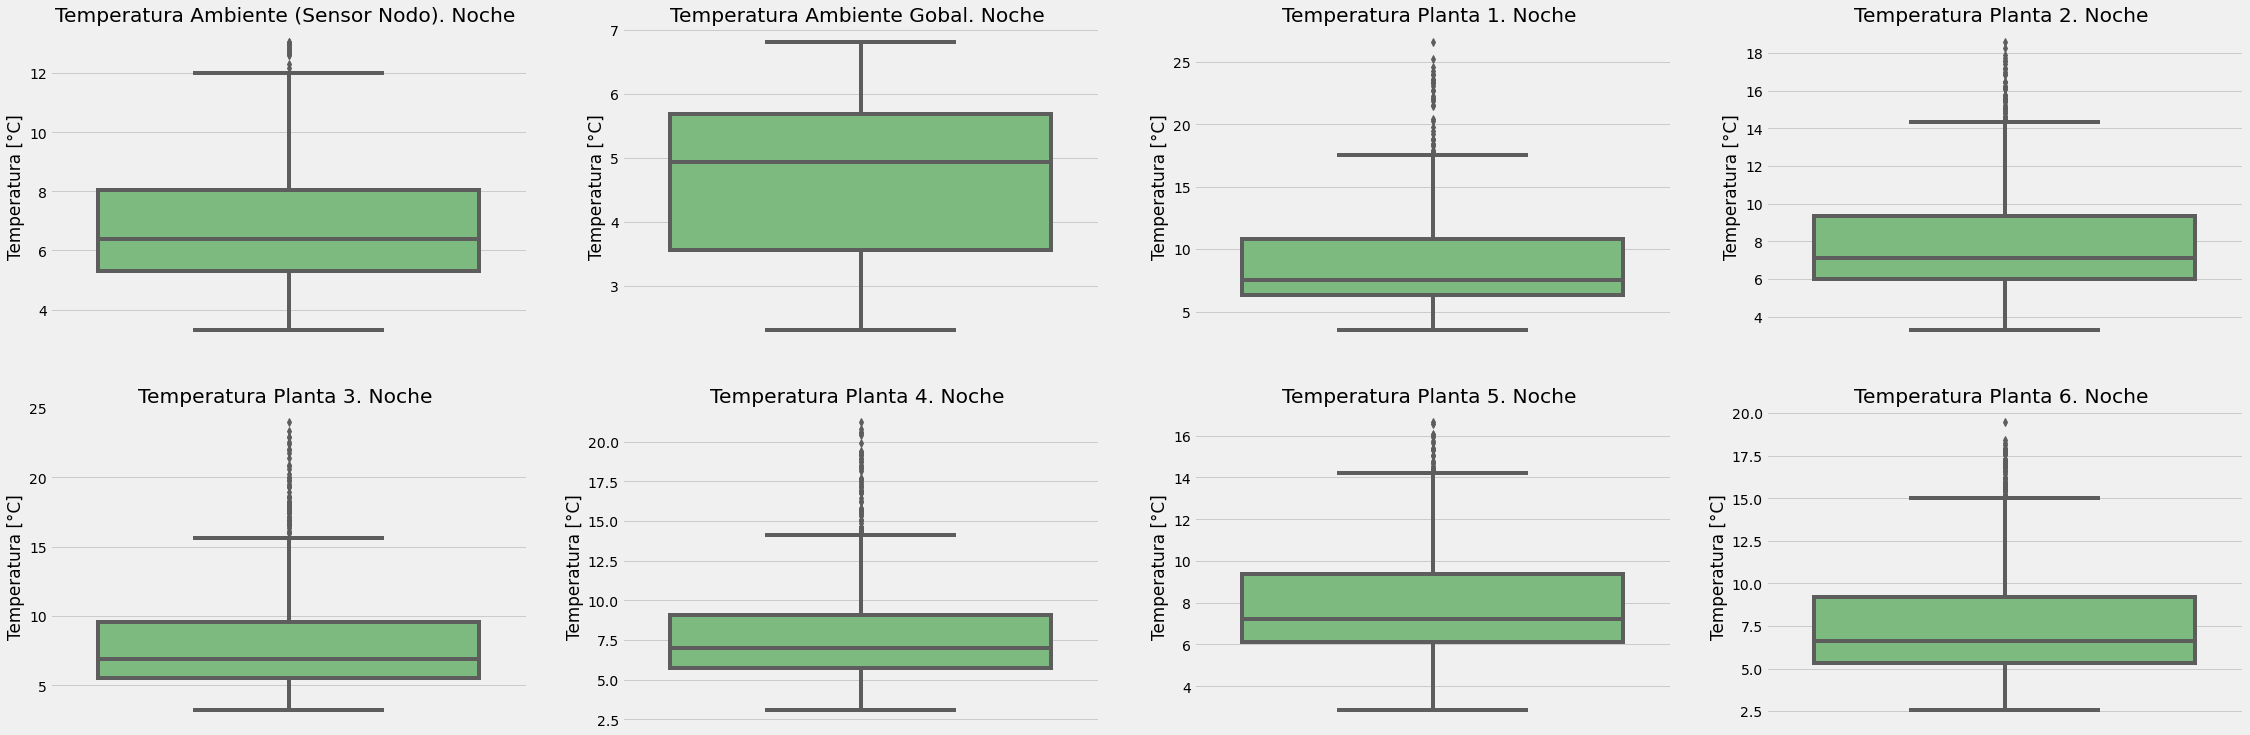

In [399]:

#DAY
plt.figure(figsize=(35, 25))

plt.subplot(441)
sns.boxplot(y=data_day['air_temp'], palette="Greens")
plt.title('Temperatura Ambiente (Sensor Nodo). Noche ')
plt.ylabel('Temperatura [°C]')

plt.subplot(442)
sns.boxplot(y=data_day['Ambient_1'], palette="Greens")
plt.title('Ambient_1')
plt.title('Temperatura Ambiente Gobal. Noche ')
plt.ylabel('Temperatura [°C]')

plt.subplot(443)
sns.boxplot(y=data_day['TempPlant1'], palette="Greens")
plt.title('Temperatura Planta 1. Noche ')
plt.ylabel('Temperatura [°C]')

plt.subplot(444)
sns.boxplot(y=data_day['TempPlant2'], palette="Greens")
plt.title('Temperatura Planta 2. Noche ')
plt.ylabel('Temperatura [°C]')

plt.subplot(445)
sns.boxplot(y=data_day['TempPlant3'], palette="Greens")
plt.title('Temperatura Planta 3. Noche ')
plt.ylabel('Temperatura [°C]')

plt.subplot(446)
sns.boxplot(y=data_day['TempPlant4'], palette="Greens")
plt.title('Temperatura Planta 4. Noche ')
plt.ylabel('Temperatura [°C]')

plt.subplot(447)
sns.boxplot(y=data_day['TempPlant5'], palette="Greens")
plt.title('Temperatura Planta 5. Noche ')
plt.ylabel('Temperatura [°C]')

plt.subplot(448)
sns.boxplot(y=data_day['TempPlant6'], palette="Greens")
plt.title('Temperatura Planta 6. Noche ')
plt.ylabel('Temperatura [°C]')

Text(0, 0.5, 'Temperatura [°C]')

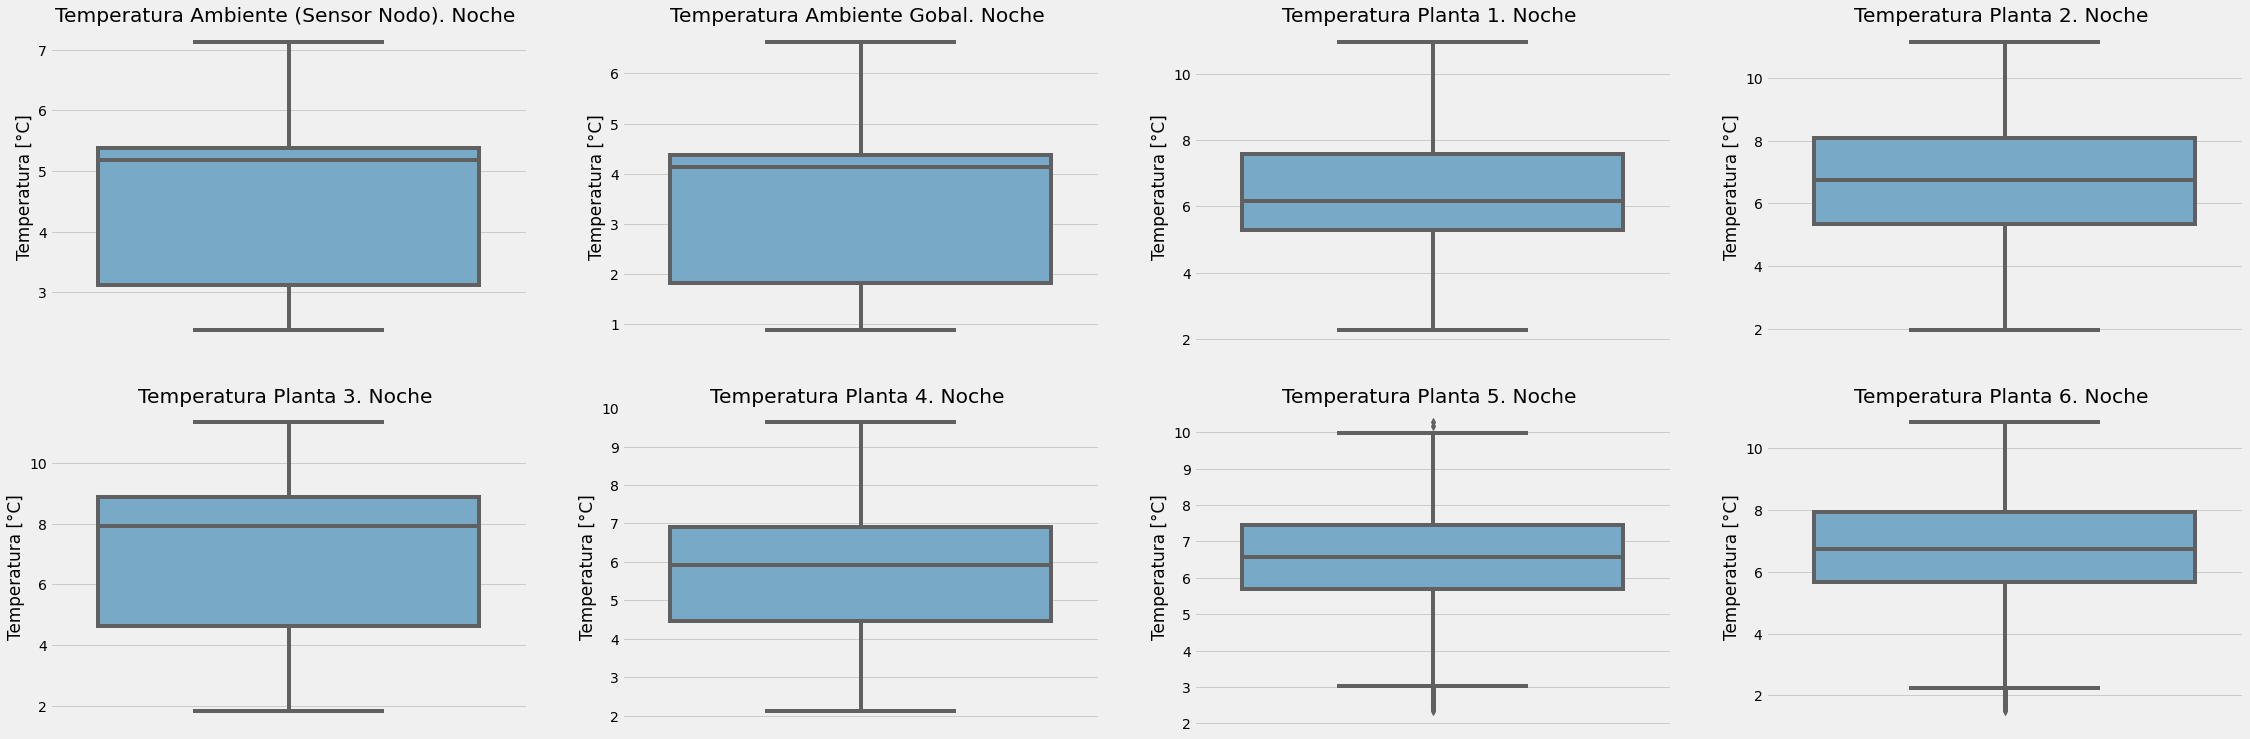

In [400]:
#Night

plt.figure(figsize=(35, 25))

plt.subplot(441)
sns.boxplot(y=data_night['air_temp'], palette="Blues")
plt.title('Temperatura Ambiente (Sensor Nodo). Noche ')
plt.ylabel('Temperatura [°C]')

plt.subplot(442)
sns.boxplot(y=data_night['Ambient_1'], palette="Blues")
plt.title('Ambient_1')
plt.title('Temperatura Ambiente Gobal. Noche ')
plt.ylabel('Temperatura [°C]')

plt.subplot(443)
sns.boxplot(y=data_night['TempPlant1'], palette="Blues")
plt.title('Temperatura Planta 1. Noche ')
plt.ylabel('Temperatura [°C]')

plt.subplot(444)
sns.boxplot(y=data_night['TempPlant2'], palette="Blues")
plt.title('Temperatura Planta 2. Noche ')
plt.ylabel('Temperatura [°C]')

plt.subplot(445)
sns.boxplot(y=data_night['TempPlant3'], palette="Blues")
plt.title('Temperatura Planta 3. Noche ')
plt.ylabel('Temperatura [°C]')

plt.subplot(446)
sns.boxplot(y=data_night['TempPlant4'], palette="Blues")
plt.title('Temperatura Planta 4. Noche ')
plt.ylabel('Temperatura [°C]')

plt.subplot(447)
sns.boxplot(y=data_night['TempPlant5'], palette="Blues")
plt.title('Temperatura Planta 5. Noche ')
plt.ylabel('Temperatura [°C]')

plt.subplot(448)
sns.boxplot(y=data_night['TempPlant6'], palette="Blues")
plt.title('Temperatura Planta 6. Noche ')
plt.ylabel('Temperatura [°C]')